# Quality assessment of ice sheet surface elevation change data from satellite observations: spatial coverage and data consistency across data from various satellite missions for glaciological and climatological applications

- Data stream: satellite (observations)
- Quality area: spatial/temporal data coverage, data consistency
- Application area: glaciological, climatological and/or hydrlogical applications, monitoring and models

Production date: 17-07-2024

Produced by: Yoni Verhaegen and Philippe Huybrechts (Vrije Universiteit Brussel)

## 🌍 Use case: Using the ice sheet surface elevation change time series as an indicator for the Antarctic ice sheet imbalance in the context of the current global warming

## ❓ Quality assessment question
* **How does the spatial coverage of the ice sheet surface elevation change data, aggregated from distinct satellite sensors and missions over time, change and how does it affect estimates of (cumulative) ice sheet-related surface elevation changes?**

The surface elevation change (SEC) product quantifies the change of the surface elevation of the ice sheets. Mapping ice sheet surface elevation change and its temporal evolution provides key information for investigating the response of ice sheets to climate change. Remote sensing techniques that use satellite data are the only feasible manner to derive estimates of surface elevation changes of the remote ice sheets on a regular basis and on a large spatial scale. Remote sensing devices are able to inspect directly and repeatedly large areas of ice, and, as such are able to examine the surface of the ice sheets. SEC data on the Climate Data Store (CDS) are derived from satellite radar altimetry, followed by filtering, corrections, and (pre/post-)processing. Such satellite altimeters measure surface elevation by determining the time delay between the transmission of a pulse and the return of the echo from the surface. This time delay is converted into a distance, which is then subtracted from the known elevation of the sensor above a reference ellipsoid. Repeated measurements from various distinct satellite missions over time, and the necessary processing of their acquired raw altimetric data, therefore results in a consistent time series of gridded ice sheet surface elevation changes. The use of these remote sensing techniques to derive ice sheet surface elevation changes, however, also has its limitations of which the user should take note when using the product. In that regard, this notebook investigates how well the timeseries of the dataset on the CDS (here we use version 4.0) can be used as an indicator for the ice sheet imbalance in the context of the current global warming. More specifically, the notebook evaluates whether the dataset is of sufficient maturity and quality for that purpose in terms of its data consistency with respect to spatial coverage, as the time series of the data represent surface elevation changes aggregated from distinct satellite sensors and missions over time, that are combined into one single time series for each pixel. 

🚨 **The surface elevation change product for the Antarctic Ice Sheet is discontinued after 2022 and will hence not be updated anymore.**

## 📢 Quality assessment statement

- Surface elevation change detection by radar altimetry is a useful tool to grasp the impact of climate change on the ice sheets. The dataset, however, also has its limitations of which the user should take note before using the product. When using the data, users should therefore be aware of the typical problem areas for radar altimetry-derived surface elevation change (SEC) products. Consulting the accompanying data quality measures, for example the amount of missing data (i.e. spatial coverage), is therefore recommended to assess the quality of the product.
- For the Antarctic Ice Sheet (AIS), the data can not be considered mature in terms of its spatial coverage (i.e. data completeness), as there is an abundant amount of unfilled data gaps. The regionally high amount of missing data in the dataset can be attributed to two main factors: satellite data coverage is not possible above certain latitudes (which varies depending on the specific satellite mission), and data acquisition around the ice sheet margins is challenging due to the complex and high-slope terrain with rapid changes of the surface characteristics (which increases the risk of invalid measurements). 
- The ice sheet surface elevation change products are at this stage therefore not found to be suitable to derive meaningful and reliable statistical properties such as means, variability and trends (and hence to deduce climate change signals). For example, the derivation of cumulative total altimetry-derived volume and mass changes would result in incorrect and unreliable numbers due to the high amount of unfilled missing values. The Antarctic surface elevation change products therefore seem to be of a lower quality than their Greenland counterpart (i.e. due to a larger polar gap, more left-over unfilled spatial data gaps, more noisy data, and an overall higher error).
- In the context of the specific use case and question, it can be said that the surface elevation change dataset for the Antarctic Ice Sheet is not of sufficient maturity and quality in terms of its spatio-temporal data completeness. The data can hence not be considered robust, mature and reliable when used to monitor Antarctic ice sheet surface elevation changes over the last several decades, and to estimate the ice sheet-related cumulative volume and mass changes and the associated trends.

## 📋 Methodology

### Short description

Surface elevation change detection by satellites is a useful tool to grasp the impact of climate change on the ice sheets. In that regard, the dataset on the Climate Data Store (CDS) provides monthly surface elevation change (SEC) values and their uncertainty for the Greenland (GrIS) and Antarctic Ice Sheet (AIS) on a 25 km spatial resolution grid. The core principle involves measuring surface elevations at different times and comparing them to detect changes. In this dataset, they are derived using satellite radar altimetry that contain data from multiple satellite missions, which are grouped together into a consistent time series for each pixel. Surface elevation changes are reported with units of meter per year and are available since 1992 at monthly-spaced intervals. Data are provided in NetCDF format as gridded data and are available for both the GrIS (excluding peripheral glaciers and ice caps) and AIS (including ice shelves). The time for a measurement mentioned in the dataset is the center of a 3-year of 5-year moving window (for the GrIS) and a 5-year moving window (for the AIS) used to derive the SEC values. In this notebook, we use version 4.0.

### Structure and (sub)sections

In this notebook, the applicability of surface elevation change data to be used as indicators for the imbalance of the ice sheets in the context of the ongoing global warming will be assessed. We will check whether the data are of sufficient adequacy in terms of its consistency for this purpose. The data time series namely represent surface elevation changes aggregated from distinct satellite sensors and missions over time, that are combined into one single time series for each pixel. This will be realized by analyzing the spatial and temporal characteristics of the gridded surface elevation change data, by quantifying the amount missing values in the dataset over time, by discussing other potential limitations and error sources of the dataset, and by evaluating the implications for the usage of the data in terms of the specific use case and question (i.e. using the ice sheet surface elevation change time series as an indicator for the ice sheet imbalance in the context of the current global warming). The structure is as follows:

- **Data preparation and processing**: this section loads packages, defines requests for download from the CDS, downloads the actual data and inspects the data to reveal its structure. Also the functions that are used in this notebook are defined in this section.
- **Quantifying Antarctic Ice Sheet surface elevation changes in space and time**: this section derives monthly-spaced and cumulative ice sheet-wide surface elevation changes since 1992 and expresses the data both as spatially distributed multiyear means and throughout a time series of ice sheet-wide surface elevation changes.
- **Checking the amount of missing data over time to inspect spatial data coverage**: this section discusses the temporal and geographical coverage of the data in the surface elevation change product for Antarctica. We therefore check the amount of missing data by comparing the amount of pixels with valid data to the surface type mask that is provided with the dataset. 
- **Other potential sources of lower data quality for the Antarctic Ice Sheet surface elevation changes**: this section discusses additional limitations of the dataset, apart from the spatial coverage issues as discussed earlier, that can be of importance for this specific use case.
- **Implications for using the ice sheet surface elevation change time series as an indicator for the Antarctic ice sheet imbalance**: the final section uses all information derived above to assess the suitability of the Antarctic Ice Sheet surface elevation change dataset (with respect to the spatial/temporal coverage and hence data completeness) to be used as an indicator for the Antarctic ice sheet imbalance in the context of the current global warming. In other words, the dataset’s applicability to monitor Antarctic Ice Sheet thinning rates and volume changes over the last several decades will be assessed and discussed.

## 📈 Analysis and results

### ⏬ Data preparation and processing

First we load the packages:

In [2]:
from matplotlib import colors
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import xarray as xr
from datetime import datetime
import pandas as pd
import seaborn as sns
import scipy.stats
from scipy.ndimage import gaussian_filter
from c3s_eqc_automatic_quality_control import download
import os
os.environ["CDSAPI_RC"] = os.path.expanduser("~/verhaegen_yoni/.cdsapirc")

plt.style.use("seaborn-v0_8-notebook")

Then we define requests for download from the CDS and download the ice sheet surface elevation change data.

In [3]:
# Select the domain: "greenland" or "antarctica"
domains = ["antarctica"]
collection_id = "satellite-ice-sheet-elevation-change"

# Define the request
request = {
    "variable": "all",
    "format": "zip",
    "climate_data_record_type": "tcdr",
    "version": "4_0",
}

# Download the data
datasets = {}
for domain in domains:
    print(f"{domain=}")
    datasets[domain] = download.download_and_transform(
        collection_id,
        request | {"domain": domain},
    ).compute()


domain='antarctica'


100%|██████████| 1/1 [00:04<00:00,  4.46s/it]


We can read and inspect the data. Let us print out the data to inspect its structure:

In [4]:
datasets

{'antarctica': <xarray.Dataset> Size: 108MB
 Dimensions:          (y: 180, x: 216, time: 307, bounds: 2)
 Coordinates:
   * time             (time) datetime64[ns] 2kB 1994-11-01T09:21:19.687500 ......
     grid_x_bounds    (bounds, x) float32 2kB -2.6e+06 -2.575e+06 ... 2.8e+06
     grid_y_bounds    (bounds, y) float32 1kB -2.2e+06 -2.175e+06 ... 2.3e+06
     grid_lon_bounds  (bounds, y, x) float32 311kB 229.8 229.5 ... 50.35 50.6
     grid_lat_bounds  (bounds, y, x) float32 311kB -59.37 -59.54 ... -57.51
     time_bounds      (bounds, time) datetime64[ns] 5kB 1992-05-02T06:21:26.71...
   * x                (x) float32 864B -2.588e+06 -2.562e+06 ... 2.788e+06
   * y                (y) float32 720B -2.188e+06 -2.162e+06 ... 2.288e+06
 Dimensions without coordinates: bounds
 Data variables:
     longitude        (y, x) float32 156kB 229.8 229.5 229.2 ... 50.37 50.63
     latitude         (y, x) float32 156kB -59.53 -59.69 -59.85 ... -57.83 -57.66
     sec              (y, x, time) float3

The version 4.0 is a gridded dataset at a 25 km spatial resolution containing monthly values of the ice sheet surface elevation change rate $\frac{dh}{dt}$ (`sec` in m/yr) and its uncertainty (`sec_uncert` in m/yr) since 1992:

$\dfrac{dh}{dt} = \dfrac{h_{t_2}-h_{t_1}}{t_{t_2}-t_{t_1}}$

The time for a measurement mentioned in the dataset is the center of a 5-year moving window used to derive the surface elevation change values. The uncertainties are here reported as precision errors or standard deviations. A land mask (`surface_type`), slope mask (`high_slope`), validity flags (`sec_ok`) are also included. 

Let us check the total temporal extent of the data:

In [5]:
time_bds = datasets['antarctica']
time_bounds_values = time_bds['time_bounds'].values
begin_period = datetime.strptime(str(time_bounds_values[0][0]).split('T')[0], "%Y-%m-%d")
end_period = datetime.strptime(str(time_bounds_values[-1][-1]).split('T')[0], "%Y-%m-%d")
time_difference = end_period - begin_period
decimal_years = time_difference.days / 365.25

print(f'The begin period of the dataset is {begin_period.date()} and the end period is {end_period.date()}, which is a total of time {decimal_years:.2f} years.')

The begin period of the dataset is 1992-05-02 and the end period is 2022-11-01, which is a total of time 30.50 years.


Let us now perform some data handling and define a plotting function before getting started with the analysis:

In [6]:
def get_maps(ds, domains):
    (sec_name,) = set(ds.data_vars) & {"sec", "dhdt"}
    da = ds[sec_name]
    da.attrs["long_name"] = "Surface elevation change rate"

    if 'greenland' in domains:
        da_dh = ds["dh"]
        da_dh.attrs["long_name"] = "Surface elevation change"
        da_dh_ok = ds["dhdt_ok"]
        da_dh_ok.attrs["long_name"] = "Validity of surface elevation change"

    da_err = ds[f"{sec_name}_uncert"]
    da_err.attrs["long_name"] = "Surface elevation change precision error"

    (mask_name,) = set(ds.data_vars) & {"land_mask", "surface_type"}
    mask = ds[mask_name] > 0
    missing = 100 * (da.sizes["time"] - da.notnull().sum("time")) / da.sizes["time"]
    missing.attrs = {"long_name": "Missing data", "units": "%"}

    if 'antarctica' in domains:
        (mask_name,) = set(ds.data_vars) & {"land_mask", "surface_type"}
        mask = (ds[mask_name] > 0) & (ds['latitude'] > -81.5)
        masked_da = da.where(mask)
        missing_lat = 100 * (da.sizes["time"] - masked_da.notnull().sum("time")) / da.sizes["time"]
        missing_lat.attrs = {"long_name": "Missing data above latitude", "units": "%"}
        missing_lat = missing_lat.where(mask)

    year_to_ns = 1.0e9 * 60 * 60 * 24 * 365
    coeffs = []
    da_cumsum = da.cumsum("time") / 12
    for degree, name in enumerate(("linear_trend", "acceleration"), start=1):
        coeff = da_cumsum.polyfit("time", degree)["polyfit_coefficients"].sel(
            degree=degree, drop=True
        )
        coeff = degree * coeff * (year_to_ns**degree)
        coeff.attrs = {
            "units": f"{da.attrs['units'].split('/', 1)[0]} yr$^{{-{degree}}}$",
            "long_name": f"{da.attrs['long_name']} {name}".replace("_", " "),
        }
        coeffs.append(coeff.rename(name))

    data_vars = [
        da.rename("sec"),
        da_err.rename("sec_err"),
        mask.rename("mask"),
        missing.rename("missing"),
        ds["high_slope"],
    ]

    if 'greenland' in domains:
        data_vars.append(da_dh.rename("dh"))
        data_vars.append(da_dh_ok.rename("dhdt_ok"))
    if 'antarctica' in domains:
        data_vars.append(missing_lat.rename("missing_lat"))

    ds = xr.merge(data_vars + coeffs)
    
    return ds.mean("time", keep_attrs=True)

# Select the specific dataset you want to process, e.g., "greenland"
datasets_original = datasets
selected_ds = datasets["antarctica"]
datasets = get_maps(selected_ds, domains)
datasets_get_maps = datasets

# Define plotting function
def plot_maps_single(da, suptitle=None, **kwargs):
    kwargs.setdefault("cmap", "RdBu")
    # Create subplots with Polar Stereographic projection
    fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.Stereographic(central_longitude=0, central_latitude=-90, true_scale_latitude=-71)})
    
    # Plot the data 
    subset_da = da
    im = subset_da.plot.imshow(ax=ax, add_colorbar=False, **kwargs)
    
    # Set extent and plot features
    ax.set_extent([da.coords['x'].values.min(), da.coords['x'].values.max(), da.coords['y'].values.min(), da.coords['y'].values.max()], ccrs.Stereographic(central_longitude=0, central_latitude=-90, true_scale_latitude=-71))
    ax.add_feature(cfeature.LAND, edgecolor='black', color='white')
    ax.add_feature(cfeature.OCEAN, color='lightblue')
    ax.coastlines()
    if suptitle:
        ax.set_title(suptitle)
    ax.gridlines(draw_labels=False, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
    
    # Add colorbar
    cb = fig.colorbar(im, ax=ax, extend='both', shrink=0.49, label=f"{da.attrs['long_name']} [{da.attrs['units']}]")

    plt.tight_layout()
    plt.show()


Now, our dataset array only holds the most important information, such as the multiyear mean surface elevation change rates (`sec`) and the arithmetic mean precision error (`sec_err`). With the function above, we also calculated linear and quadratic trends of surface elevation changes, as well as the amount of missing values. 

With everything ready, let us now begin with the analysis:

### 📉 Quantifying Antarctic Ice Sheet surface elevation changes in space and time

We begin by plotting the Antarctic multiyear mean surface elevation change rate $\overline {\frac{dh}{dt}}$ between the beginning and end period with the defined plotting function:

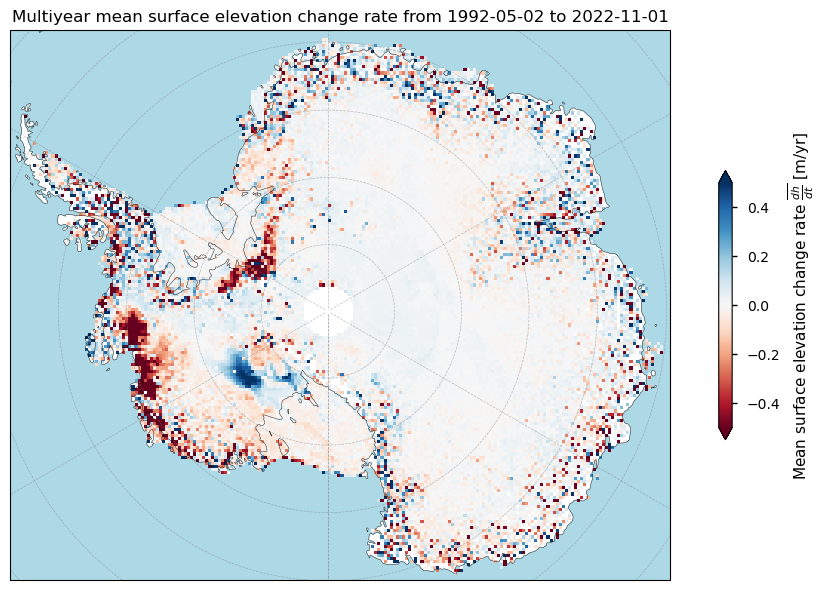

In [7]:
# Apply the function to the surface elevation change rate data
da = datasets["sec"]
da.attrs = {
    "long_name": r"Mean surface elevation change rate $\overline {\frac{dh}{dt}}$",
    "units": "m/yr",
}

# Define dataset to be plotted
suptitle_text = rf"Multiyear mean surface elevation change rate from {begin_period.date()} to {end_period.date()}"
_ = plot_maps_single(
    da,
    vmin=-0.5,
    vmax=0.5,
    suptitle=suptitle_text,
)


The figure displays the multiyear mean surface elevation change rate of the Antarctic ice sheet from 1992 to 2022. The map shows spatial patterns of surface elevation changes across the continent, with color gradients representing the multiyear mean surface elevation change in meter per year (m/yr).

The blue areas indicate regions where the surface of the ice sheet is increasing in height, while red areas show where the ice sheet is decreasing in height. Notably, the figure highlights significant thinning along the West Antarctic Ice Sheet and the Antarctic Peninsula, particularly in the vicinity of the Pine Island and Thwaites Glaciers. These regions are well-known for their instability and contributions to sea-level rise due to accelerated ice flow and increased melting (Schröder et al., 2019). Conversely, some areas in East Antarctica and parts of the West Antarctic Ice Sheet show modest elevation gains, which could be attributed to increased snowfall or dynamic thickening. In many parts of the ice sheet, the pattern, however, exhibits a noisy appearance. A notable data gap is also present around the South Pole (i.e. the well-known 'polar gap', of which the extent varies depending on the satellite mission).

Let us quantify the ice sheet-wide average value:

In [329]:
print(f'The Antarctic ice sheet-wide average surface elevation change rate value between {begin_period.date()} and {end_period.date()} is {(np.nanmean(da.values)):.5f} m/yr.')

The Antarctic ice sheet-wide average surface elevation change rate value between 1992-05-02 and 2022-11-01 is -0.01691 m/yr.


The negative value indicates that the surface of the ice sheet, in general, has been slightly lowering during the last several decades, resulting in net negative values. The overall pattern thus suggests that the Antarctic Ice Sheet is experiencing a net loss in ice volume, primarily driven by the dynamic thinning of glaciers and ice streams in West Antarctica.

Let us express this as a time series:

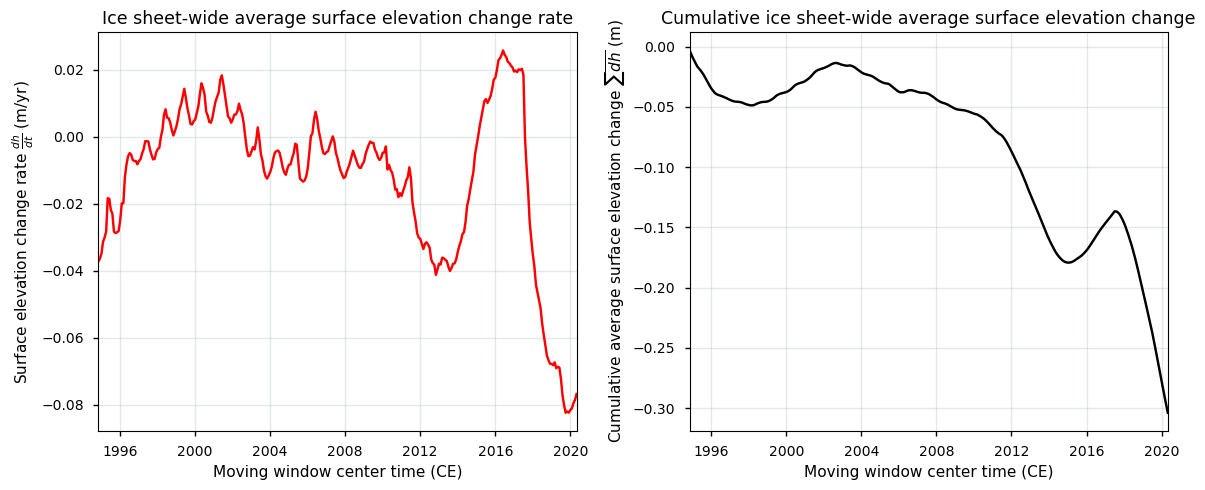

In [8]:
# Define the function
def get_timeseries(ds):
    ds["time"].attrs["long_name"] = "Time"

    (sec_name,) = set(ds.data_vars) & {"sec", "dhdt"}
    da = ds[sec_name]
    da.attrs["long_name"] = "Surface elevation change rate"

    if 'greenland' in domains:
        da_dh = ds["dh"]
        da_dh.attrs["long_name"] = "Surface elevation change"
        da_dh.attrs["units"] = "m"

    da_err = ds[f"{sec_name}_uncert"]
    da_err.attrs["long_name"] = "Surface elevation change rate error"

    (mask_name,) = set(ds.data_vars) & {"land_mask", "surface_type"}
    mask = ds[mask_name] > 0
    missing = 100 * (mask.sum() - da.notnull().sum(("x", "y"))) / mask.sum()
    missing.attrs = {"long_name": "Missing data", "units": "%"}

    if 'antarctica' in domains:
        (mask_name,) = set(ds.data_vars) & {"land_mask", "surface_type"}
        mask = (ds[mask_name] > 0) & (ds['latitude'] > -81.5) 
        masked_da = da.where(mask)
        missing_lat = 100 * (mask.sum() - masked_da.notnull().sum(("x", "y"))) / mask.sum()
        missing_lat.attrs = {"long_name": "Missing data above latitude", "units": "%"}

    data_vars = [
        da.rename("sec"),
        da_err.rename("sec_err"),
        missing.rename("missing"),
    ]

    if 'greenland' in domains:
        data_vars.append(da_dh.rename("dh"))
    if 'antarctica' in domains:
        data_vars.append(missing_lat.rename("missing_lat"))
    
    ds = xr.merge(data_vars)

    # Apply mean to all variables 
    mean_ds = ds.mean(("x", "y"), keep_attrs=True)
    
    # Combine the results
    ds = xr.merge([mean_ds])

    return ds

selected_ds = datasets_original["antarctica"]
datasets_timeseries = get_timeseries(selected_ds)

# Plot the data
datasets_timeseries["time"].attrs["units"] = "yr"
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.plot(datasets_timeseries["time"],datasets_timeseries["sec"],'r')
ax1.grid(color='#95a5a6',linestyle='-',alpha=0.25)
ax1.set_xlim(np.min(datasets_timeseries["time"]),np.max(datasets_timeseries["time"]))
ax1.set_xlabel("Moving window center time (CE)")
ax1.set_ylabel(r"Surface elevation change rate $\frac{dh}{dt}$ (m/yr)")
ax1.set_title("Ice sheet-wide average surface elevation change rate",fontsize=12.5);
ax2.plot(datasets_timeseries["time"],(np.cumsum(datasets_timeseries["sec"]/12)),'k')
ax2.grid(color='#95a5a6',linestyle='-',alpha=0.25)
ax2.set_xlim(np.min(datasets_timeseries["time"]),np.max(datasets_timeseries["time"]))
ax2.set_xlabel("Moving window center time (CE)")
ax2.set_ylabel("Cumulative average surface elevation change $\sum \overline{dh}$ (m)")
ax2.set_title("Cumulative ice sheet-wide average surface elevation change",fontsize=12.5);
plt.tight_layout()
plt.show()

Remember here that the x-axis shows the centered time of a 5-year moving window used to derive the surface elevation change values. The left panel displays the ice sheet-wide average surface elevation change rate. The rate of surface elevation change, measured in meter per year (m/yr), shows considerable variability over the period. The right panel shows the cumulative ice sheet-wide average surface elevation change, highlighting the net change in surface elevation over the same period. This panel indicates an overall negative trend, with the ice sheet experiencing a clear net lowering of its surface elevation over time (Shepherd et al., 2019). 

### ✅ Checking the amount of missing data over time to inspect spatial data coverage 

Let us now begin our analysis of data consistency over time due to the use of different satellite sensors and missions. We start by plotting the amount of missing data as a time series. In the dataset, this can be assessed comparing the amount of pixels with valid data to the land mask (`surface_type`), where pixels with a value larger than 0 represent ice-covered grid points of the main ice sheet body or ice shelves. The time series looks as follows:

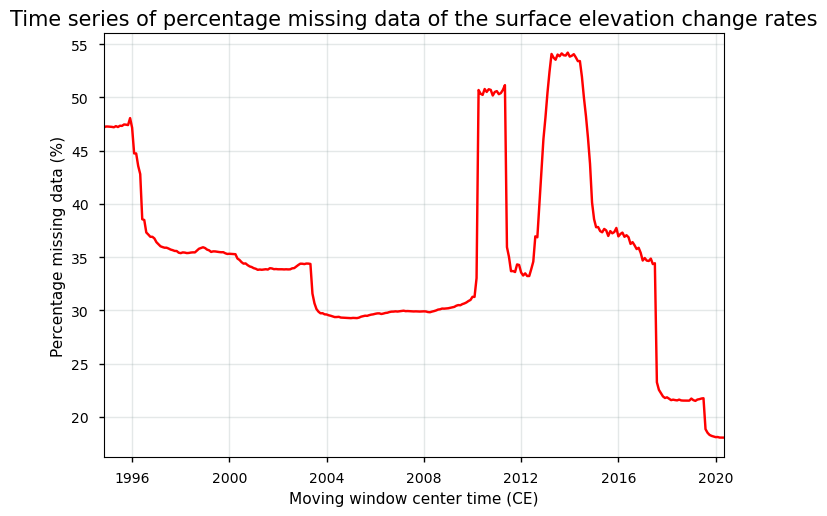

In [331]:
fig, ax = plt.subplots()
ax.plot(datasets_timeseries["time"],datasets_timeseries["missing"],'r')
ax.grid(color='#95a5a6',linestyle='-',alpha=0.25)
ax.set_xlim(np.min(datasets_timeseries["time"]),np.max(datasets_timeseries["time"]))
ax.set_xlabel("Moving window center time (CE)")
ax.set_ylabel("Percentage missing data (%)")
ax.set_title("Time series of percentage missing data of the surface elevation change rates",fontsize=15);
plt.show()

Prior to 2010, the ERS-1, ERS-2 and Envisat satellite missions were in use to derive surface elevation changes. They operated continuously between ±81.5° latitude, which resulted in a rather large "polar gap". The polar gap in surface elevation change radar altimetry refers to the regions near the poles that satellite radar altimeters cannot observe directly. Most radar altimeters operate in polar orbits but do not cover the exact poles, leaving a circular area around each pole (the polar gap) that lacks direct altimetric measurements. The size of this gap varies depending on the satellite mission and characteristics. From 2010 onwards, CryoSat-2 became operational as well. Despite increased spatial coverage near the South Pole, with measurements up to ±88° latitude, this period is characterized by the highest amount of missing pixels in the data. The coverage dip around 2010 comes from declining amounts of Envisat data. After 2016, the combination of CryoSat-2 and Sentinel-3A/B resulted in a sharp decline of the amount of missing values, reaching a minimum at the end of the time series.

Let us have the spatial distribution plotted:

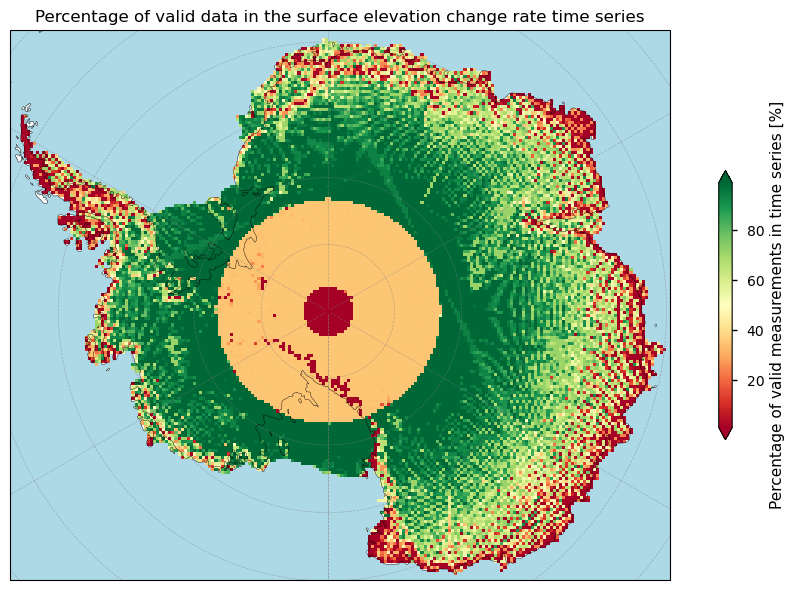

In [334]:
# Apply the function to the surface elevation change missing data
antarctica_dataset = datasets_original['antarctica']
land_mask = antarctica_dataset['surface_type']

da = 100-datasets_get_maps["missing"]
da = da.where(land_mask.values != 0, np.nan)
da.attrs = {
    "long_name": r"Percentage of valid measurements in time series",
    "units": "%",
}

# Plot the data
suptitle_text = rf"Percentage of valid data in the surface elevation change rate time series"
_ = plot_maps_single(
    da,
    cmap="RdYlGn",
    vmin=1,
    vmax=99,
    suptitle=suptitle_text,
)


The figure presents a map of Antarctica showing the percentage of valid data in the surface elevation change rate time series, with a color scale ranging from red (0%) to green (100%) to indicate data completeness. The reasons for the regionally abundant amount of missing data in the Antarctic surface elevation change dataset are twofold: on the one hand, satellite data did not cover the ice sheet over latitudes higher than a satellite mission-dependent threshold latitude, and on the other hand, data acquisition is complicated around the marginal regions due to a more complex terrain (e.g. with an increased risk of slope errors), variable surface characteristics (e.g. with variable surface penetration depths of the radar pulse), and dynamic ice flow patterns (e.g. with rapid and extensive changes of the surface characteristics), which can lead to greater measurement uncertainties and invalid data acquisitions. Unlike the SEC dataset for the Greenland Ice Sheet, data gaps have not been filled up for the AIS.

The central part of Antarctica around the South Pole, depicted in orange and red colors, has a very low percentage of valid measurements due to the limitations of satellite altimetry at higher latitudes, commonly referred to as the "polar gap." The remaining interior regions of the ice sheet, shown in green, mostly have a high percentage of valid measurements, indicating consistent coverage by satellite observations over the years. These areas benefit from the frequent and reliable data acquisition from satellites. Marginal zones show mixed patterns, with decreasing data completeness towards the outer edges of the ice sheet, likely due to complex topography and other challenging surface characteristics for data acquisition. The figure thus clearly reflects the impact of various satellite missions over time. Early satellite missions like ERS-1, ERS-2, and Envisat provided valuable data but had coverage limitations over higher latitudes (south of 81.5°S), resulting in significant data gaps. CryoSat-2, launched in 2010 CE, improved polar coverage (measurements are possible until 88°S) but still does not cover the central polar gap completely. Moreover, the CryoSat-2 era exhibits more frequent data gaps around the margins due to its long repeat cycle. More recently, the Sentinel-3A/B missions have further enhanced data coverage and frequency, particularly in coastal and peripheral regions. The polar gap again extends from 81.5°S onwards.

The spatial variability in data completeness must be accounted for in scientific analyses and modeling efforts, as areas with low data completeness may introduce uncertainties in ice sheet mass balance estimates. The high data completeness in some regions allows for reliable analysis of surface elevation changes, crucial for understanding dynamic processes such as glacier flow and surface melting. Overall, the figure underscores the strengths and limitations of current satellite radar altimetry missions and provides insights into areas with robust data coverage versus regions needing further attention.

Let us evaluate how the amount of missing data outside of the polar gap (taken as 81.5°S) is linked to the slope of the terrain and the magnitude of the surface elevation chagne rates:

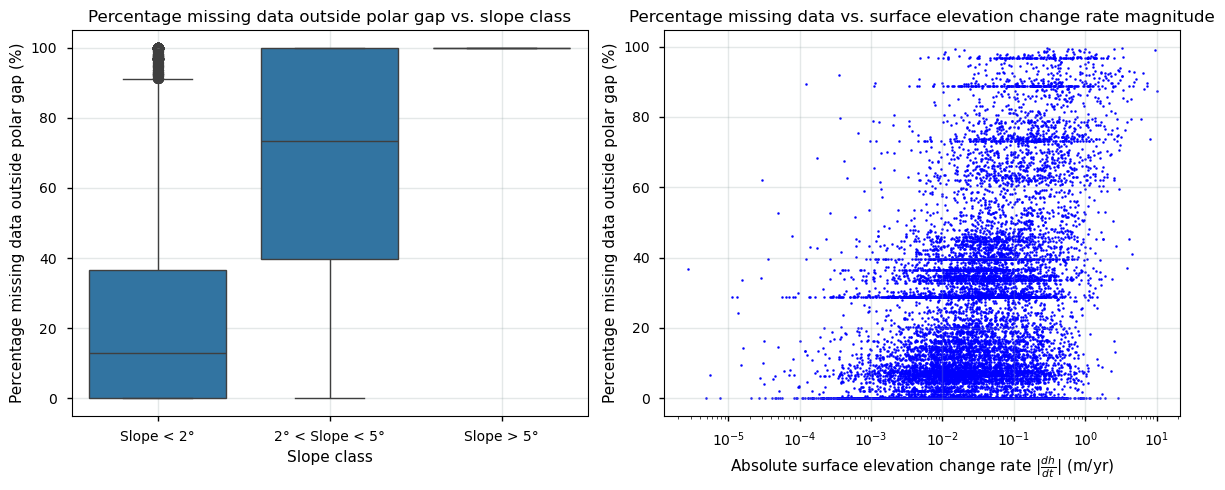

In [337]:
datasets = {
    'high_slope': datasets['high_slope'],  
    'sec_err': datasets['sec_err'],
    'sec': datasets['sec'],
    'missing_lat':datasets['missing_lat']
}

# Flatten the arrays and remove NaN values for the boxplot
df = pd.DataFrame({
    'slopemask_ais': np.ravel(datasets["high_slope"]),
    'mean_missing_ais': np.ravel(datasets["missing_lat"])
}).dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot
sns.boxplot(data=df, x='slopemask_ais', y='mean_missing_ais', ax=ax1)
ax1.set_ylabel(r'Percentage missing data outside polar gap (%)')
ax1.set_xlabel('Slope class')
ax1.set_title("Percentage missing data outside polar gap vs. slope class")
ax1.set_xticks([0, 1, 2])
ax1.set_xticklabels(["Slope < 2°", "2° < Slope < 5°", "Slope > 5°"])
#ax1.set_yscale('log')
ax1.grid(color='#95a5a6',linestyle='-',alpha=0.25)

# Scatter plot
sec_err = np.ravel(datasets["missing_lat"])
sec = np.ravel(datasets["sec"])

# Remove NaN values for the scatter plot
mask = ~np.isnan(sec_err) & ~np.isnan(sec)
ax2.scatter(abs(sec[mask]), abs(sec_err[mask]), color='blue', s=2)
ax2.set_xlabel(r'Absolute surface elevation change rate $|\frac{dh}{dt}|$ (m/yr)')
ax2.set_ylabel(r'Percentage missing data outside polar gap (%)')
ax2.set_title("Percentage missing data vs. surface elevation change rate magnitude")
#ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.grid(color='#95a5a6',linestyle='-',alpha=0.25)

plt.tight_layout()
plt.show()


The presented graphs offer an analysis of the spatial distribution and quality of radar altimetry-derived surface elevation changes, highlighting the challenges faced in areas with different surface slopes and dynamic changes. The first graph illustrates the relationship between the slope class of the ice sheet surface and the percentage of missing data outside the polar gap. It reveals that regions with gentle slopes (less than 2 degrees) have the least amount of missing data, indicating that radar altimetry performs better in flatter areas. As the slope increases to between 2 and 5 degrees, the percentage of missing data significantly rises, showing increased difficulty in capturing reliable measurements. Steep areas with slopes greater than 5 degrees exhibit the highest percentage of missing data (i.e. 100% of missing data), underscoring the challenges posed by highly inclined surfaces and the associated slope-induced errors.

The second graph demonstrates the relationship between the absolute surface elevation change rate magnitude and the percentage of missing data. A clear trend emerges, showing that regions with larger elevation changes tend to have higher percentages of missing data. This suggests that more dynamic or complex surface features, which correspond to greater changes in elevation, are harder to consistently capture with radar altimetry. The concentration of points in the lower left of the plot indicates that stable regions with smaller surface elevation changes generally have lower percentages of missing data, reinforcing the notion that less dynamic areas are better captured by radar altimetry. The surface elevation change rates with the highest magnitudes namely take place especially along the margins, where the complex and high-slope terrain prevails. The radar signal can furthermore penetrate into the snowpack until a certain depth, depending on the properties of the snow layers and the frequency of the sensor. Snow melting allows, for example, for variable snowpack penetration depths of the radar pulse (e.g. due to a changing liquid water content or refrozen ice lenses), hence possibly introducing artificial elevation changes (i.e. for example when the radar pulse is reflected from liquid water within the snowpack).

Overall, the analysis highlights the impact of surface slope and dynamic regions on the data quality of radar altimetry-derived surface elevation change rates over the Antarctic Ice Sheet. Flatter areas tend to provide more reliable data, while steeper and more dynamic regions pose more significant challenges, leading to a higher data loss. Understanding these limitations is essential for accurately interpreting the data and its use for climate change monitoring.

### 🚨 Other potential sources of lower data quality for the Antarctic Ice Sheet surface elevation changes

Other potential sources of lower data quality of the Antarctic Ice Sheet (AIS) surface elevation changes can be attributed to several factors. First, the spatial resolution of 25 km is too coarse compared to the Global Climate Observing System (GCOS) requirements (GCOS, 2022). Second, the AIS file contains significant spatially missing data due to the large polar gap and unfilled spatial data gaps, especially around the margins. This is in contrast to the Greenland Ice Sheet (GrIS) file, which lacks data for peripheral glaciers and ice caps but has filled missing spatial data on the main ice sheet. Third, the AIS surface elevation change (SEC) products contain noisier data, as well as higher overall error values than the GrIS surface elevation change data.

Data around the margins and in complex terrain of the ice sheets are particularly sensitive to errors, resulting in lower quality data in these areas. Additionally, the SEC data represent ice sheet surface elevation changes, which means that if ice sheet volume and mass change data are required, the SEC data need to be corrected for non-mass change processes (e.g. firn densification and vertical bed motion) and converted to mass change using appropriate density values. The coarse spatial resolution, the high amount of missing data values, the noisy data appearance, and the high error values highlight the limitations of the Antarctic Ice Sheet surface elevation change product, making it generally less reliable than the GrIS surface elevation change product. Therefore, users should be aware of these limitations and consult accompanying data quality measures, such as the error and the amount of missing data, to assess the quality of the product. This is particularly important when interpreting data from around the South Pole (due to the polar gap) and the ice sheet margins and areas with complex terrain, where higher errors and lower data quality issues are more prevalent.

### 📌 Implications for using the ice sheet surface elevation change time series as an indicator for the Antarctic ice sheet imbalance

Using the Antarctic Ice Sheet (AIS) surface elevation change (SEC) time series as an indicator for the Antarctic ice sheet imbalance presents several implications based on the provided analysis above. The time series of the ice sheet-wide average SEC rate and the cumulative SEC changes shows a general trend of surface elevation lowering, especially prominent after 2010, reflecting an overall imbalance and a net lowering of the surface. The varying spatial coverage of the data that are being fed into these trends should, however, be considered for proper evaluation and interpretation.

When assessing the amount of missing data in the dataset, a polar gap where no data are available is revealed, predominantly around the South Pole. This gap, caused by the limitations of satellite coverage, particularly affects the central region of Antarctica, leaving a substantial area unmonitored. However, with the use of the CryoSat-2 satellite in 2010, the polar gap has been reduced from regions south of 81.5°S to regions south of 88°S. Data gaps around the South Pole thus coincide with the use of various satellite missions over time. The recent years hereby show a lower percentage of missing data, reflecting improvements in data acquisition and processing due to the use of a combination of CryoSat-2 and Sentinel-3A/B data. Apart from the polar gap, unfilled data gaps are also dominantly present around the margins of the ice sheet. A comparison with slope classes indicates that areas with higher surface slopes tend to have a higher percentage of missing data, which can affect the accuracy of SEC measurements in these regions. Also areas with a relatively high magnitude of surface elevation changes are more prone to data gaps. Hence, in general, radar altimeters used to derive surface elevation changes perform more accurately in the central, flat regions of the Antarctic ice sheet, which have a simpler topography and a more stable surface, compared to the coastal areas with a more complex terrain (with steep slopes, valleys and ridges and rapid changes of the surface). Due to the high amount of missing data, the derivation of cumulative changes would result in an incorrect and unreliable result.

These findings collectively highlight the challenges and limitations of using the surface elevation change time series as an indicator for Antarctic ice sheet imbalance. The presence of spatially and temporally varying data gaps, especially in high-slope areas and the central polar region, poses challenges for accurately assessing ice sheet surface elevation and the corresponding altimetry-derived volume and mass changes. The quality of the surface elevation change products for Antarctica is generally lower compared to the Greenland Ice Sheet, as it also exhibits more data gaps, more noise and higher errors. The coarse spatial resolution further complicates the detection of fine-scale changes necessary for precise estimates. Consequently, while the SEC time series provides valuable insights into ice sheet's response to climate change, careful consideration of data gaps and the related quality issues is essential for robust interpretations and conclusions regarding the Antarctic ice sheet imbalance.

To mitigate the limitations of using ice sheet surface elevation change (SEC) time series as an indicator for Antarctic ice sheet imbalance, users can integrate multiple data sources into the surface elevation change dataset, including gravimetric mass balance data from the GRACE/GRACE-FO missions and ice velocity data from synthetic aperture radar (SAR), to achieve a more comprehensive understanding of the ice sheet dynamics. Combining these datasets can help fill data gaps of surface elevation (ice thickness) changes and improve the robustness of volume and mass change estimates. Additionally, users can use higher-resolution datasets or regional studies for finer spatial detail, which is particularly useful for studying specific areas such as ice sheet margins and regions with complex topography. Applying advanced data processing techniques, such as machine learning algorithms, can also help to estimate and address missing data, hereby enhancing the overall accuracy and reliability of the SEC measurements.

## ℹ️ If you want to know more

### Key resources

- "Ice sheet surface elevation change rate for Greenland and Antarctica from 1992 to present derived from satellite observations" on the CDS
- [C3S EQC custom functions](https://github.com/bopen/c3s-eqc-automatic-quality-control/tree/main/c3s_eqc_automatic_quality_control), `c3s_eqc_automatic_quality_control` prepared by [BOpen](https://www.bopen.eu).

### References

- GCOS (Global Climate Observing System) (2022). The 2022 GCOS ECVs Requirements (GCOS-245). World Meteorological Organization: Geneva, Switzerland. doi: https://library.wmo.int/idurl/4/58111.

- Schröder, L., Horwath, M., Dietrich, R., Helm, V., van den Broeke, M.R., and Ligtenberg, S.R.M. (2019). Four decades of Antarctic surface elevation change from multi-mission satellite altimetry. The Cryosphere, 13, p. 427-449. https://doi.org/10.5194/tc-13-427-2019.

- Shepherd, A., Gilbert, L., Muir, A.S., Konrad, H., McMillan, M., Slater, T., Briggs, H.K., Sundal, A. V., Hogg A.E., and Engdahl, M.E. (2019). Trends in Antarctic Ice Sheet elevation and mass. Geophysical Research Letters, 46, p. 8174-8183. https://doi.org/10.1029/2019GL082182.